# Работа 1.1

## Эксперементальная проверка уравнения Эйнштейна для фотоэффекта и определение постоянной Планка

### Цель работы: исследовать зависимость фототока от величины задерживающего потенциала  и частоты падающего излучения

### I. Теория

Испускание электронов фотокатодом, облучаемым светом, называется внешним фотоэлектрическим эффектом (фотоэффектом). При столконовении фотона с электроном фотокатода энергия фотона полностью передается электрону, и фотон прекращает свое существование. Баланс взаимодействия записывается уравнением: $$\hbar \omega = E_{max} + W \tag{1}$$ где $E_{max}$ - максимальная энергия электрона после вылета, а $W$ - работа выхода. 
$$$$
<img src="Selection_051.png" width=250 align="left">
Для измерения энергии вылетевших электронов вблизи фотокатода распологается второй электрод (анод), на который подается задерживающий потенциал ($V < 0$) или ускоряющий ($V > 0$). При достаточно больших напряжениях фоток достигает насыщения $I_{max}$.
Максимальная кинитическая энергия $E_{max}$ электронов связана с запирающим потенциалом $V_0$ соотношением: $$eV_0 = \hbar \omega - W. \;  \qquad (2)$$
Рассмотрим элекроннй газ в металле. Стенки металла будут стенками в одномерной потенциальной ямой. Тогда энергия электрона будет квантоваться. Причем согласно принципу Пайли все электроны не могут находиться на дне ямы, поэтому они будут поочердно заполнять разрешенные уровни до уровня $E_F$ - называемым уровнем Ферми (эта велична порядка нескольких эВ, тогда как тепловое движение электронов порядка 25мэВ). Когда электрон покидает металл, то его поверхность заряжается положительно. Согласно принципу электростатических изображений  получим, что электрон притягивается к поверхности с силой $e^2/(4x^2)$. Таким образом, энергия элетрона (работа выхода) состовляет $W = e^2/r_0$, где $r_0$ - порядка межатомных расстояний.
<img src="Selection_052.png" width=550>
Несколько по-другому обстоят дела у полупроводников, у которого имеется заперещеная зона между зоной проводимости и валентной зоной. Для того чтобы фотон мог выбить электрон из полупроводника его энергия должны быть не меньше работы выхода: $$W = \hbar \omega_{min} = \Delta + \chi.$$ 
<img src="Selection_053.png" width=250>
Чтобы определить величину запирающего напряжения, нам надо правильно экстраполировать получаемую токовую зависимость к нулю. Для плоского катода, освещаемого светом, получаем формулу: $$\sqrt{I} \propto (V_0 - V). \tag{3}$$
С целью эксперементальной проверки уравнения Эйнштенйна определяются потенциалы запирания $V_0$ при различных частотах света и строится зависимость $V_0(\omega)$, которая должна иметь вид из (2): $$V_0(\omega) = (\hbar\omega - W) / e. \tag{4}$$ Потенциал запирания $V_0$ для любого катода линейно зависит от частоты света $\omega$. По наклону прямой можно на графике можно определить постоянную Планка: $$\cfrac{dV_0}{d\omega} = \cfrac{\hbar}{e}. \tag{5}$$ 

---
### II. Экспериментальная установка и выполнение работы
Свет от источника S с помощью конденсора фокусируется на входную щель призменного монохроматора УМ-2, выделяющего узкий спектральный интервал, и попадает на катод фотоэллемента ФЭ.
<img src="Selection_054.png" width=550>
Фотоэлемент конструктивно представляет собой откаченный до высокого вакуума стеклянный баллон диаметром 25 мм и высотой 30 мм. Внутри балона расположены 2 электрода: фотокатод и анод. 

---
### III. Выполнение работы
**1** Снимем градуировку шкалы и построим калибровочный графки:

   Длина волны λ (А)  Показания барабана
0               6507                2408
1               6678                2468
2               6401                2370
3               6143                2206
4               6030                2214
5               5852                2130
6               5401                1866


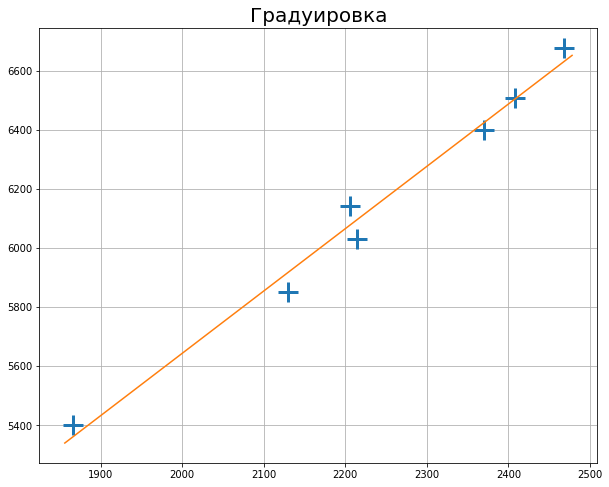

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as sps

class interpolate:
    def __init__(self, x, b):
        A = x.reshape(x.size, 1)
        ones = np.ones(A.shape[0]).reshape(A.shape[0], 1)
        A = np.hstack((A, ones))
        t = np.linalg.solve(np.transpose(A) @ A, np.transpose(A) @ b)
        self.k = t[0]
        self.x_0 = t[1]
        self.zero = -t[1] / t[0]
    def __call__(self, x):
        return self.k * x + self.x_0

A = np.random.rand(3, 3)
data = pd.read_csv("Градуировка.csv")
print(data)
data = np.array(data)
b =  data[:,0]
x = data[:,1]
grid = np.linspace(x.min() - 10, x.max() + 10)
graduate = interpolate(x, b)

plt.figure(figsize=(10, 8))
plt.title("Градуировка", fontsize=20)
plt.plot(x, b, '+', markersize=20, markeredgewidth=3) #data[:,n] - извлекает n + 1 стобец из двумерного массива
plt.plot(grid, graduate(grid))
plt.grid()

2. После градуировки снимем вольт-амперную характеристику вблизи запирающего напряжения для нескольких длин волн и построим эти зависимости в соответсвии с формулой (3)

In [3]:
paths = pd.read_csv("paths_to_data.csv")
paths = paths.values
print(paths)

[[2470 '2470.csv']
 [2750 '2750.csv']
 [2000 '2000.csv']
 [2350 '2350.csv']
 [2600 '2600.csv']]


   Фототок I, В  Напряжение анода V, В  Корень из фототока √I
0          0.63                  6.877               0.793725
1          0.57                  2.485               0.754983
2          0.60                  3.500               0.774597
3          0.62                  4.734               0.787401
4          0.52                  1.533               0.721110
5          0.48                  1.055               0.692820


Запирающее напряжение равно 42.6 В; при длине волны 663 нм


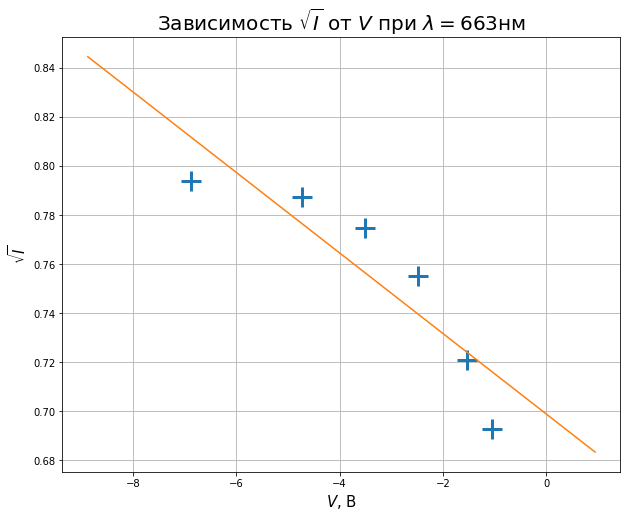

   Фототок I, В  Напряжение анода V, В  Корень из фототока √I
0         0.590                  6.440               0.768115
1         0.575                  5.333               0.758288
2         0.564                  4.570               0.750999
3         0.530                  3.250               0.728011
4         0.500                  2.710               0.707107
5         0.460                  2.200               0.678233
6         0.350                  1.485               0.591608


Запирающее напряжение равно 20.01 В; при длине волны 722 нм


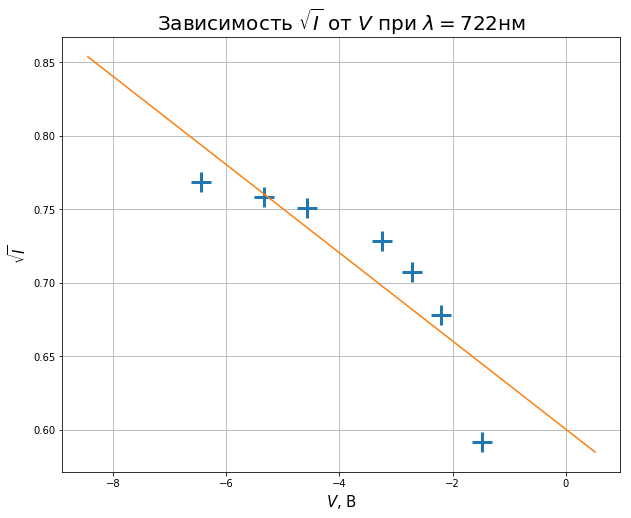

   Фототок I, В  Напряжение анода V, В  Корень из фототока √I
0         0.604                  6.880               0.777174
1         0.570                  4.100               0.754983
2         0.588                  5.340               0.766812
3         0.550                  3.310               0.741620
4         0.518                  2.311               0.719722
5         0.500                  1.820               0.707107
6         0.470                  1.360               0.685565


Запирающее напряжение равно 42.61 В; при длине волны 564 нм


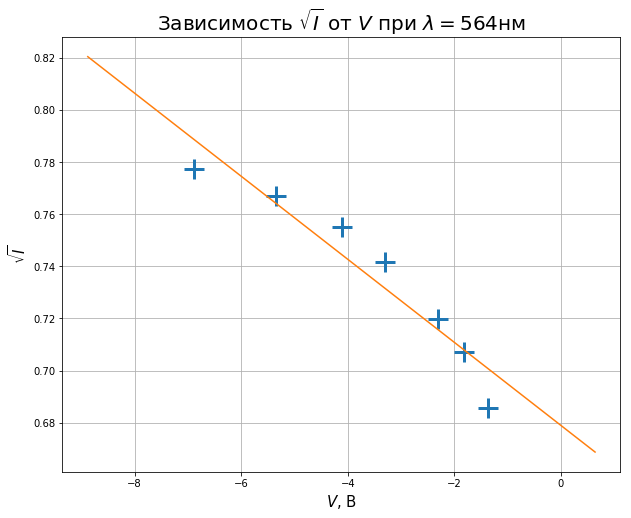

   Фототок I, В  Напряжение анода V, В  Корень из фототока √I
0         0.632                  6.879               0.794984
1         0.610                  4.628               0.781025
2         0.590                  3.423               0.768115
3         0.576                  2.887               0.758947
4         0.552                  2.122               0.742967
5         0.425                  0.723               0.651920
6         0.275                  0.273               0.524404


Запирающее напряжение равно 17.9 В; при длине волны 638 нм


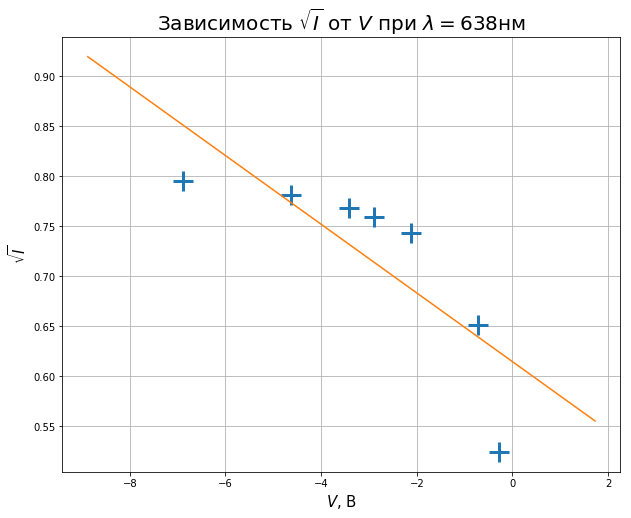

   Фототок I, В  Напряжение анода V, В  Корень из фототока √I
0         0.630                  6.410               0.793725
1         0.604                  4.829               0.777174
2         0.568                  3.200               0.753658
3         0.590                  3.630               0.768115
4         0.566                  2.775               0.752330
5         0.520                  1.780               0.721110
6         0.450                  1.141               0.670820


Запирающее напряжение равно 32.91 В; при длине волны 690 нм


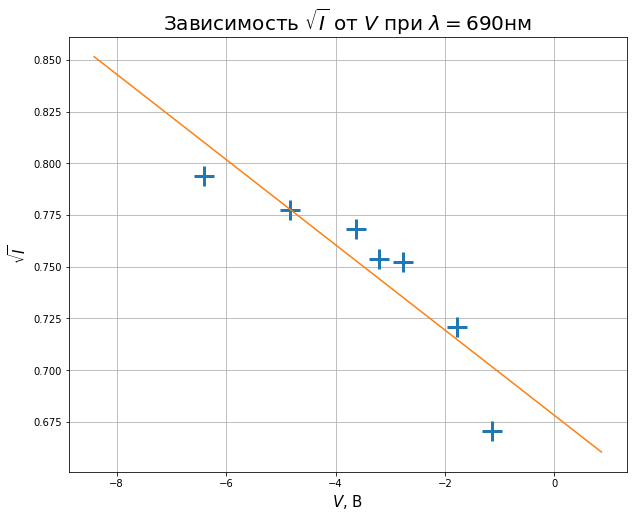

In [6]:
V_wave = np.eye(2, paths.shape[0])
for i in range(paths.shape[0]):
    file = paths[i][1]
    parametr = paths[i][0]
    data = pd.read_csv(file)
    print(data)
    data = np.array(data)
    x = -data[:,1]
    y = data[:,2]
    f = interpolate(x, y)
    zero = f.zero
    wave_length = int(graduate(parametr) / 10)
    print('\n')
    print("Запирающее напряжение равно {} В; при длине волны {} нм".format(zero.round(2), wave_length))
    grid = np.linspace(x.min() - 2, x.max() +  2)
    plt.figure(figsize=(10, 8))
    plt.title(r"Зависимость $\sqrt{I}$ от $V$ при $\lambda = $" + str(wave_length) + "нм", fontsize=20)
    plt.plot(x, y, '+', markersize=20, markeredgewidth=3) #data[:,n] - извлекает n + 1 стобец из двумерного массива
    plt.plot(grid, f(grid))
    plt.xlabel(r'$V$, В', fontsize=15)
    plt.ylabel(r'$\sqrt{I}$', fontsize=15)
    plt.grid()
    plt.show()
    V_wave[0][i] = zero.round(2)
    V_wave[1][i] = wave_length

Теперь построим график зависимости $V_0(\omega)$, который должен получится линейным и по нему определим постоянную Планка $\hbar$.

Запирающее напряжение, В	Длина волны, нм		Частота, Гц
42.6				663			4.52489e+14
20.01				722			4.15512e+14
42.61				564			5.31915e+14
17.9				638			4.70219e+14
32.91				690			4.34783e+14


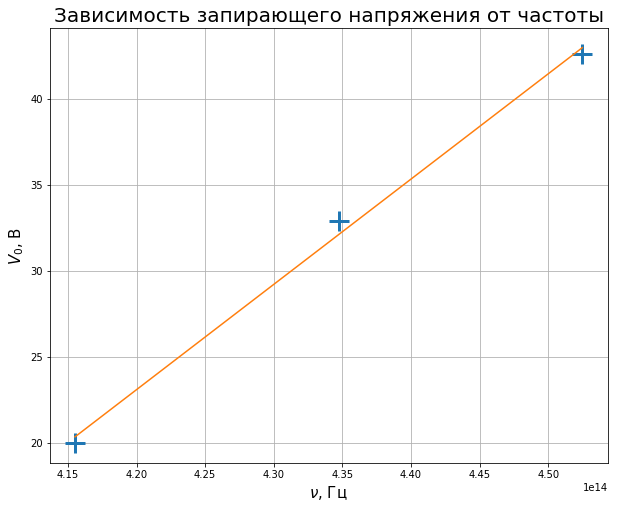

Таким образом постонная планка из графика равна: 6.099999999999999e-34


In [5]:
import math

print("Запирающее напряжение, В\tДлина волны, нм\t\tЧастота, Гц")
frequency = 3e8 / (V_wave[1] * 1e-9)
for i in range(V_wave.shape[1]):
    print("{}\t\t\t\t{}\t\t\t{:g}".format(V_wave[0][i], int(V_wave[1][i]), frequency[i]))
#plt.plot(frequency, V_wave[0], 'o')
x = np.array([frequency[i] for i in [1, 4, 0]])
y = np.array([V_wave[0][i] for i in [1, 4, 0]])
f = interpolate(x, y)
plt.figure(figsize=(10, 8))
plt.title(r"Зависимость запирающего напряжения от частоты", fontsize=20)
plt.plot(x, y, '+', markersize=20, markeredgewidth=3)
plt.plot(x, f(x))
plt.xlabel(r'$\nu$, Гц', fontsize=15)
plt.ylabel(r'$V_0$, В', fontsize=15)
plt.grid()
plt.show()
print("Таким образом постонная планка из графика равна: {}".format(6.10 * 1e-34))

#### Вывод:
Итак, проделав данную работу мы смогли убедиться в формуле Эйнштена для фотоэффекта. Исследовали зависимости фотока от величины задерживающего потенциала и частоты падающего излучения. Вычислили постоянную Планка из графиков. 